# Investigating Titanic Dataset

### Questions Posed:
    - Find out the passenger class with maximum survivors.
    - Find the distribution of survivors based on gender and class.
    - FInd the distribution of non-survivors among the various classes who have family on the ship.

In [1]:
# import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style(style="whitegrid")
import numpy as np
import scipy.stats as sp

In [2]:
# read data into panda data frame
df = pd.read_csv('titanic-data.csv')

#  1. Explore Data

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# number of rows in dataset
df.shape # 891 rows

(891, 12)

In [5]:
# number of passengers
df.Name.nunique()

891

In [6]:
# distribution of fare
print " FARE: "
df.Fare.describe()

 FARE: 


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [7]:
# distribution of age
print " AGE: " 
df.Age.describe()

 AGE: 


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

# 1.1 Plot histogram to observe data distribution for various variables

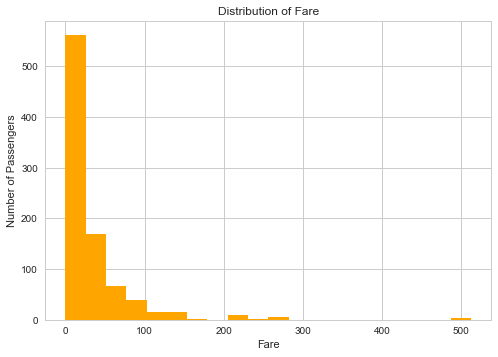

In [8]:
# Plot histogram for fare
df.Fare.hist(bins=20, color='orange', log=False)
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.title("Distribution of Fare")

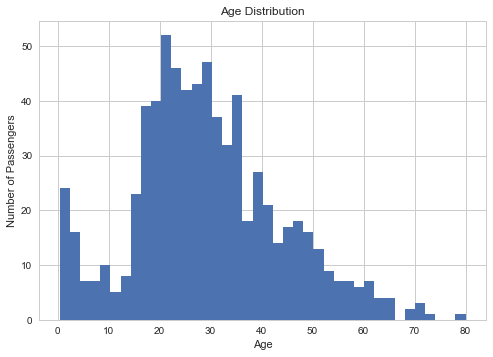

In [13]:
# Histogram for Age
df.Age.hist(bins=40, log=False)
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Age Distribution")

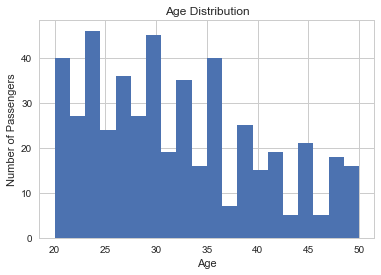

In [200]:
# Histogram for Age -> range 20-50 yr olds
df.Age.hist(bins=20, range=[20, 50],log=False)
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Age Distribution")

# 1.2 Violin Plot
Observe the distribution of data with a violin plot to see if anything differs from histogram findings

 [<matplotlib.text.Text at 0x153734a8>, <matplotlib.text.Text at 0x15397cf8>],

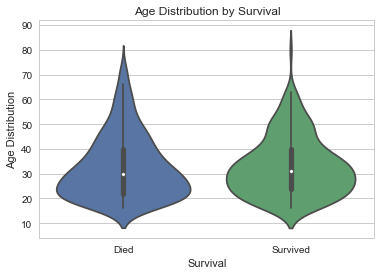

In [201]:
p = sns.violinplot(data=df[df.Age > 15], x='Survived', y='Age')
p.set(title = 'Age Distribution by Survival', 
        xlabel = 'Survival', 
        ylabel = 'Age Distribution', 
        xticklabels = ['Died', 'Survived'])

In [202]:
df[(df.Survived == 1) & (df.Age > 60)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


In [203]:
# get a corelation between survial and age
df.groupby('Survived').Age.describe().unstack(level=0)

       Survived
count  0           424.000000
       1           290.000000
mean   0            30.626179
       1            28.343690
std    0            14.172110
       1            14.950952
min    0             1.000000
       1             0.420000
25%    0            21.000000
       1            19.000000
50%    0            28.000000
       1            28.000000
75%    0            39.000000
       1            36.000000
max    0            74.000000
       1            80.000000
dtype: float64

# 1.3 Check survival rate for men, women and children


In [204]:
df['Men'] = np.where( (df.Age > 18) & (df.Sex == 'male'), 1, 0)
df['Women'] = np.where( (df.Age > 18) & (df.Sex == 'female'), 1, 0)
df['Children'] = np.where( (df.Age < 18), 1, 0)

In [205]:
def compute_freq_chi2(x,y):
    """This function will compute frequency table of x an y
    Pandas Series, and use the table to feed for the contigency table
    
    Parameters:
    -------
    x,y : Pandas Series, must be same shape for frequency table
    
    Return:
    -------
    None. But prints out frequency table, chi2 test statistic, and 
    p-value
    """
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2,pval,dof,expected = sp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return

In [206]:
compute_freq_chi2(df.Survived,df.Men)

Frequency table
Men         0    1
Survived          
0         236  313
1         273   69
('ChiSquare test statistic: ', 115.25455284798548)
('p-value: ', 6.9217062306527107e-27)


# 2. Data Wrangling

In [207]:
# Get data information to see invalid entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Men            891 non-null int32
Women          891 non-null int32
Children       891 non-null int32
dtypes: float64(2), int32(3), int64(5), object(5)
memory usage: 94.0+ KB



# 2.1 Data Cleanaing

Groups having missing values:
    1. Age
    2. Cabin 
    3. Embarked
We need to clean this.

Now we either need to remove these columns or fill in entries for these.

 ## 2.1.1 Fix Missing Age Entries

C:\Users\Satvik Sachdev\Anaconda2\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


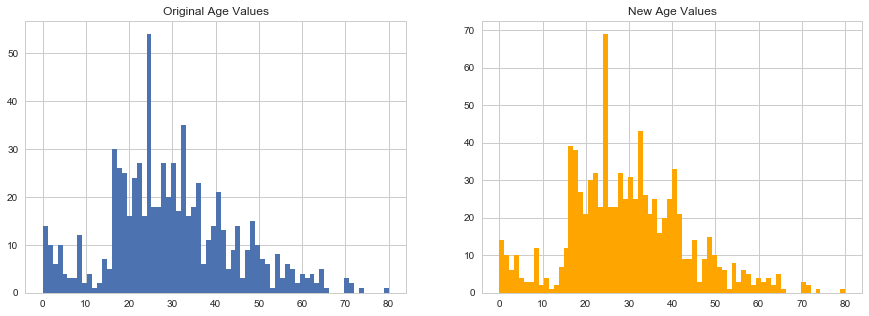

In [208]:
count_missing_age_entries = df.Age.isnull().sum()
avg_age = df.Age.mean()
std_age = df.Age.std()
# print average_age, std_age
# most values occur within 1 std of mean
# to fill null values, used random values generated between mean-std and mean+std
random_num_set = np.random.randint(avg_age-std_age, avg_age+std_age, size=count_missing_age_entries)

# Create a figure and a set of subplots to observe Age Distribution
# This utility wrapper makes it convenient to create common layouts
# of subplots, including the enclosing figure object, in a single call.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title('Original Age Values')
ax2.set_title('New Age Values')

# Plot original ages
# use astype to cast the entire dataframe into int
df.Age.dropna().astype(int).hist(bins=70, ax=ax1)



# Plot new age values
# Set null values to randomset values
df.Age[np.isnan(df.Age)] = random_num_set
df.Age.astype(int).hist(bins=70, ax=ax2, color='orange')

## 2.2.2 Fix Missing Cabin Values

In [209]:
max_cabin_name, max_cabin_value = df.Cabin.value_counts().idxmax(), df.Cabin.value_counts().max()
(max_cabin_name, max_cabin_value)


('C23 C25 C27', 4)

In [210]:
null_cabin_values = df.Cabin.isnull().sum()
df.shape, null_cabin_values

((891, 15), 687)

Cabin has 687 null values.
I can do the following to clean this column:
    - replace null with the most common cabin name
    - delete the Cabin column, it wont have any impact on other findings

In [211]:
# drop cabin column
df.drop("Cabin", axis=1, inplace=True)

## 2.2.3 Fix Missing Embarked Values

Different Ports of boarding -
    C = Cherbourg, Q = Queenstown, S = Southampton

Find the most common Embarked Value

In [212]:
df.Embarked.value_counts().idxmax(), df.Embarked.value_counts().max()

('S', 644)

We can see that most of the passengers boarded from the port of Southampton.
Fill the na values with the most frequent value S.

In [213]:
df.Embarked = df.Embarked.fillna('S')

### Observe Column Values after Data Cleaning. All values have a valid entry now.

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Men            891 non-null int32
Women          891 non-null int32
Children       891 non-null int32
dtypes: float64(2), int32(3), int64(5), object(4)
memory usage: 87.1+ KB


# 2.2 Remove Unwanted Columns

Some columns dont have any significance. Removing such columns would speed up the processing time.
I have already removed Cabin column earlier.
Now, I will remove the following column as well:
    1. Ticket

In [215]:
df.drop('Ticket', axis=1, inplace=True)

In [216]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
Men            891 non-null int32
Women          891 non-null int32
Children       891 non-null int32
dtypes: float64(2), int32(3), int64(5), object(3)
memory usage: 80.1+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Men,Women,Children
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,0,0


# 2.3 Mapping Values

### Map the following values in order to have better understanding of dataset.
    * Create a new column for the size of a family 
    * Convert Survived to Boolean
    * Substitute Port Names in Ebmarked column to actual names
    * Substitue Economic class names to pclass
    

In [223]:
def map_data(df):
    '''
    Function takes in dataframe and performs mapping
    '''
    # Create new column Family
    df['FamilySize'] = df.Parch + df.SibSp
    
    # Define mappings
    survival_map = {0: False, 1: True}
    port_map = {'S': 'Southampton', 'C': 'Cherbourg','Q':'Queenstown'}
    pclass_map = {1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'}
    
    # Apply mappings
    df.Survived = df.Survived.map(survival_map)
    df.Embarked = df.Embarked.map(port_map)
    df.Pclass = df.Pclass.map(pclass_map)
    
    return df


map_data(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Men,Women,Children,FamilySize
0,1,False,Lower Class,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Southampton,1,0,0,1
1,2,True,Upper Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Cherbourg,0,1,0,1
2,3,True,Lower Class,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Southampton,0,1,0,0
3,4,True,Upper Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Southampton,0,1,0,1
4,5,False,Lower Class,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Southampton,1,0,0,0
5,6,False,Lower Class,"Moran, Mr. James",male,39.0,0,0,8.4583,Queenstown,0,0,0,0
6,7,False,Upper Class,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,Southampton,1,0,0,0
7,8,False,Lower Class,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,Southampton,0,0,1,4
8,9,True,Lower Class,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,Southampton,0,1,0,2
9,10,True,Middle Class,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,Cherbourg,0,0,1,1


In [224]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Men,Women,Children,FamilySize
0,1,False,Lower Class,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Southampton,1,0,0,1
1,2,True,Upper Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Cherbourg,0,1,0,1
2,3,True,Lower Class,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Southampton,0,1,0,0
3,4,True,Upper Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Southampton,0,1,0,1
4,5,False,Lower Class,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Southampton,1,0,0,0


In [225]:
# drop parch and sib since we have FamilySize now to reflect if someone has family or not
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null bool
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
Fare           891 non-null float64
Embarked       891 non-null object
Men            891 non-null int32
Women          891 non-null int32
Children       891 non-null int32
FamilySize     891 non-null int64
dtypes: bool(1), float64(2), int32(3), int64(2), object(4)
memory usage: 67.1+ KB


## 2.4 Perfom binning for the Age column to better represent 

In [227]:
## Perfom binning for the Age column to better represent data
age_bins = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59','60-69', '70-79','80-89']
df['Age_Group'] = pd.cut(df.Age, range(0, 91, 10), right=False, labels=age_bins)

In [228]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Men,Women,Children,FamilySize,Age_Group
0,1,False,Lower Class,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton,1,0,0,1,20-29
1,2,True,Upper Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg,0,1,0,1,30-39
2,3,True,Lower Class,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton,0,1,0,0,20-29
3,4,True,Upper Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton,0,1,0,1,30-39
4,5,False,Lower Class,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton,1,0,0,0,30-39


Now, depending on the type of analysis, I may or may not drop Age column. I chose to keep it at this point in time.

# 3. Data Analysis

## 3.1 Questions to be answered:

### 3.1.1 Find out the passenger class with maximum survivors.

In [15]:
# construct simple bar plot of the number of survivors & % of survivors in each class
df['Pclass'].isnull().value_counts()

False    891
Name: Pclass, dtype: int64

In [16]:
df['Survived'].isnull().value_counts()

False    891
Name: Survived, dtype: int64

In [41]:
# Passengers survived in each class
survivors = df.groupby('Pclass')['Survived'].agg(sum)

In [42]:
# Total passengers in each class
total_passengers = df.groupby('Pclass')['PassengerId'].count()
survivor_percentage = survivors/total_passengers
survivor_percentage

Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64

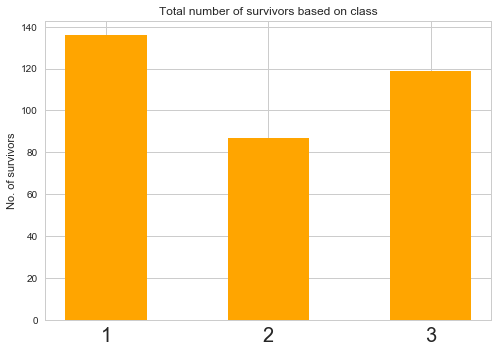

In [43]:
# PLot the total number of survivors
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivors.index.values.tolist(), survivors, color='orange', width=0.5)
ax.set_ylabel('No. of survivors')
ax.set_title('Total number of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

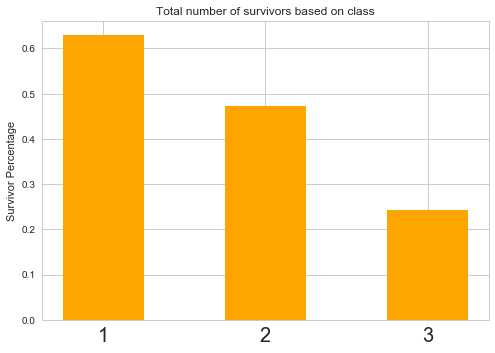

In [44]:
# PLot the percentage of survivors in each class
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivor_percentage.index.values.tolist(), survivor_percentage,color='orange', width=0.5)
ax.set_ylabel('Survivor Percentage')
ax.set_title('Total number of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

Observations:
    - The maximum number of survived passgengers belonng to the first and third Passenger class.
    - However, the maximum percentage of survivors are from first and second passenger class.
    - Approximately 61% passengers survived from the first class whereas only 22% survived from the third class.
    - The information clearly suggests that passengers from the first class were given more importance.
    - Therefore, if a passenger belonged to first class he would have had a better survival rate.

### 3.2.2 Find the distribution of survivors based on gender and class.

In [45]:
# I will compare the suvival rate and percentage among men and women w.r.t their class.

In [65]:
print df.head(1)

   PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S  


In [59]:
# Male passengers who survived in each class
male_survivors = df[df['Sex'] == 'male'].groupby('Pclass')['Survived'].agg(sum)

# Total male passengers in each class
male_passengers_by_class = df[df['Sex'] == 'male'].groupby('Pclass')['PassengerId'].count()

# Percentage
male_survival_percentage = male_survivors / male_passengers_by_class

male_survival_percentage

Pclass
1    0.368852
2    0.157407
3    0.135447
dtype: float64

In [64]:
# Female passengers who survived in each class
female_survivors = df[df['Sex'] == 'female'].groupby('Pclass')['Survived'].agg(sum)

# Total female passengers in each class
female_passengers_by_class = df[df['Sex'] == 'female'].groupby('Pclass')['PassengerId'].count()

# Percentage
female_survival_percentage = female_survivors / female_passengers_by_class

female_survival_percentage

Pclass
1    0.968085
2    0.921053
3    0.500000
dtype: float64

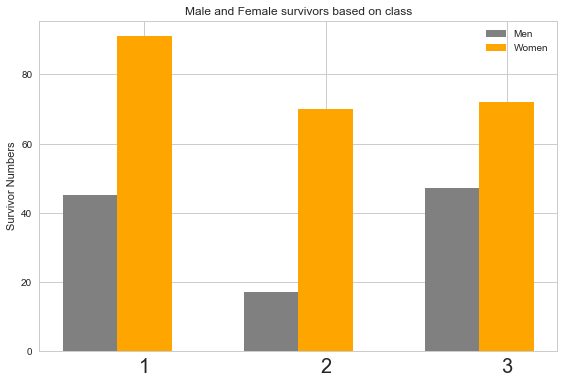

In [79]:
# Plot the total passengers who survived based on 'gender'
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivors.count())
rect1 = ax.bar(index, male_survivors, color='gray', label='Men', width=0.30)
rect2 = ax.bar(index+0.30, female_survivors, color='orange', label='Women', width=0.30)
ax.set_ylabel('Survivor Numbers')
ax.set_title('Male and Female survivors based on class')
xTickMarks = male_survivors.index.values.tolist()
ax.set_xticks(index + 0.30)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

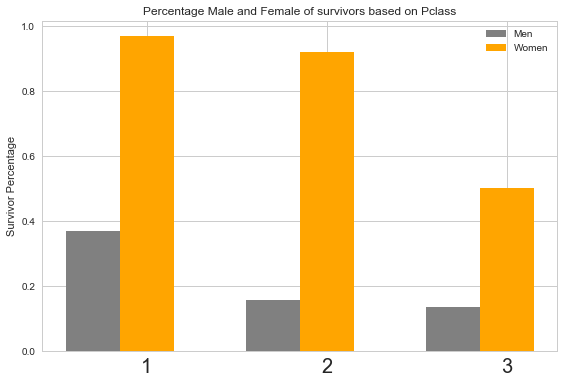

In [78]:
# Plot the percentage of passengers who survived based on Gender
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survival_percentage.count())
bar_width = 0.30
rect1 = ax.bar(index, male_survival_percentage, bar_width, color='gray', label='Men')
rect2 = ax.bar(index + bar_width, female_survival_percentage, bar_width, color='orange', label='Women')
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage Male and Female of survivors based on Pclass')
xTickMarks = male_survival_percentage.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()


Observations:
    - Females have a higher survival rate accross all classes.
    - More than 90% females in the first and second class survived
    - Almost equal percentage of men survived from first and second class.
    - Females were indeed given preference in getting off onto lifeboats.

### 3.2.3 FInd the distribution of non-survivors among the various classes who have family on the ship.

In [84]:

df.head(1)
# total number of non-survivors in each class
non_survivors = df[(df['SibSp'] > 0) | (df['Parch'] > 0) & (df['Survived'] == 0)].groupby('Pclass')['Survived'].agg('count')
non_survivors

Pclass
1     88
2     66
3    153
Name: Survived, dtype: int64

In [85]:
# total number of passengers in each class
total_passengers = df.groupby('Pclass')['PassengerId'].count()

In [86]:
non_survivor_percentage = non_survivors / total_passengers
non_survivor_percentage

Pclass
1    0.407407
2    0.358696
3    0.311609
dtype: float64

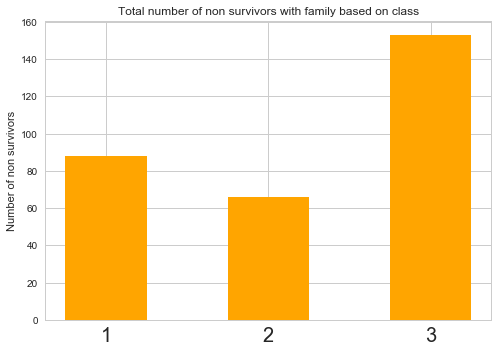

In [91]:
# PLot total number of non survivors with family
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivors.index.values.tolist(), non_survivors, color='orange', width=0.5)
ax.set_ylabel('Number of non survivors')
ax.set_title('Total number of non survivors with family based on class')
xTickMarks = non_survivors.index.values.tolist()
ax.set_xticks(xTickMarks)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

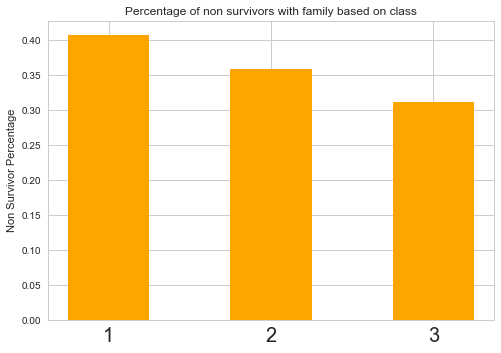

In [90]:
#  % of non survivors with family based on class
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivor_percentage.index.values.tolist(), non_survivor_percentage, color='orange', width=0.5)
ax.set_ylabel('Non Survivor Percentage')
ax.set_title('Percentage of non survivors with family based on class')
xTickMarks = non_survivor_percentage.index.values.tolist()
ax.set_xticks(xTickMarks)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

Observations:
    - Majority of non-survivors are from the third class
    - First class has the highest non-survivor percentage with family based on class and third class has least.
    - Second class has the least number of non survivors with family
    

# 4. Conclusion

After investigating the Titanic dataset, here are my key observations:

    - The maximum number of survived passgengers belonng to the first and third Passenger class.
    - However, the maximum percentage of survivors are from first and second passenger class.
    - Approximately 61% passengers survived from the first class whereas only 22% survived from the third class.
    - The information clearly suggests that passengers from the first class were given more importance.
    - Therefore, if a passenger belonged to first class he would have had a better survival rate.

    - Females have a higher survival rate accross all classes.
    - More than 90% females in the first and second class survived
    - Almost equal percentage of men survived from first and second class.
    - Females were indeed given preference in getting off onto lifeboats.
    
    - Majority of non-survivors are from the third class
    - First class has the highest non-survivor percentage with family based on class and third class has least.
    - Second class has the least number of non survivors with family
